# Wk18-Lecture01-CodeAlong: Preparing Time Series Data

## Learning Objectives

- By the end of this CodeAlong, students will be able to:
    - Create date time indices
    - Resample at various frequencies
    - Impute null values for time series 
    - Convert wide-form data to long-form
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np

pd.set_option('display.float_format', lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

# Datetime Objects

In [3]:
## Import datetime library
import datetime as dt

In [4]:
# Get Today's date(&time) from python's datetime.datetime module
today_datetime = dt.datetime.today()
today_datetime

datetime.datetime(2023, 8, 1, 18, 16, 31, 64489)

In [5]:
type(today_datetime)

datetime.datetime

In [6]:
print(today_datetime)

2023-08-01 18:16:31.064489


### Datetime Formats

- Datetime objects have a `.strftime()` method (string-format-time)

- 📖 **strftime cheat sheet: https://strftime.org/**
- 📖 **Official Table of Python datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes **


| Directive   | Meaning                                                                                                                                                                          | Example                                                                      |
|:------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------|
| %a          | Weekday as locale’s abbreviated name.                                                                                                                                            | Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)                              |
| %A          | Weekday as locale’s full name.                                                                                                                                                   | Sunday, Monday, …, Saturday (en_US); Sonntag, Montag, …, Samstag (de_DE)     |
| %w          | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 0, 1, …, 6                                                                   |
| %d          | Day of the month as a zero-padded decimal number.                                                                                                                                | 01, 02, …, 31                                                                |
| %b          | Month as locale’s abbreviated name.                                                                                                                                              | Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de_DE)                           |
| %B          | Month as locale’s full name.                                                                                                                                                     | January, February, …, December (en_US); Januar, Februar, …, Dezember (de_DE) |
| %m          | Month as a zero-padded decimal number.                                                                                                                                           | 01, 02, …, 12                                                                |
| %y          | Year without century as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 99                                                                |
| %Y          | Year with century as a decimal number.                                                                                                                                           | 0001, 0002, …, 2013, 2014, …, 9998, 9999                                     |
| %H          | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 23                                                                |
| %I          | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 01, 02, …, 12                                                                |
| %p          | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM, PM (en_US); am, pm (de_DE)                                               |
| %M          | Minute as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %S          | Second as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %f          | Microsecond as a decimal number, zero-padded to 6 digits.                                                                                                                        | 000000, 000001, …, 999999                                                    |
| %z          | UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).                                                                                                 | (empty), +0000, -0400, +1030, +063415, -030712.345216                        |
| %Z          | Time zone name (empty string if the object is naive).                                                                                                                            | (empty), UTC, GMT                                                            |
| %j          | Day of the year as a zero-padded decimal number.                                                                                                                                 | 001, 002, …, 366                                                             |
| %U          | Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %W          | Week number of the year (Monday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Monday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %c          | Locale’s appropriate date and time representation.                                                                                                                               | Tue Aug 16 21:30:00 1988 (en_US); Di 16 Aug 21:30:00 1988 (de_DE)            |
| %x          | Locale’s appropriate date representation.                                                                                                                                        | 08/16/88 (None); 08/16/1988 (en_US); 16.08.1988 (de_DE)                      |
| %X          | Locale’s appropriate time representation.                                                                                                                                        | 21:30:00 (en_US); 21:30:00 (de_DE)                                           |
| %%          | A literal '%' character.                                                                                                                                                         | %                                                                            |

In [7]:
print(today_datetime)

2023-08-01 18:16:31.064489


Let's test out the strftime codes:

In [8]:
## Month/Day/Year 24Hour Time
mo_day_yr_24hr_time_fmt = '%m/%d/%Y %H:%M'
today_dt_24hr_str = today_datetime.strftime(mo_day_yr_24hr_time_fmt)
today_dt_24hr_str

'08/01/2023 18:16'

In [9]:
## Monday/Day/Year 12 Hour Time (+AM/PM)
mo_day_yr_12hr_time_fmt =  '%m/%d/%Y %I:%M %p'

today_dt_12hr_str = today_datetime.strftime(mo_day_yr_12hr_time_fmt)
today_dt_12hr_str

'08/01/2023 06:16 PM'

> `.strftime` returns a STRING

In [10]:
type(today_dt_24hr_str)

str

`pd.to_datetime` PREVIEW!!

We can use Pandas to convert the string to a Timestamp object

In [11]:
## Convert to Timestamp type! 
converted_date_pandas = pd.to_datetime(today_dt_24hr_str)
converted_date_pandas

Timestamp('2023-08-01 18:16:00')

> We will use pandas datetime objects/functions whenever possible, as they save us a lot of time!

# Working with Time Series - Data with Regular Intervals

### Stock Data (S&P500)

- S&P 500 (Kibot) 
     - IVE S&P 500 1-min aggregate data from: http://www.kibot.com/free_historical_data.aspx

In [12]:
sp500_min_df = pd.read_csv('Data/stocks/sp500_ive_min_tick_bidask.csv')
sp500_min_df.head()

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52


In [13]:
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      445762 non-null  object 
 1   Time      445762 non-null  object 
 2   BidOpen   445762 non-null  float64
 3   BidHigh   445762 non-null  float64
 4   BidLow    445762 non-null  float64
 5   BidClose  445762 non-null  float64
 6   AskOpen   445762 non-null  float64
 7   AskHigh   445762 non-null  float64
 8   AskLow    445762 non-null  float64
 9   AskClose  445762 non-null  float64
dtypes: float64(8), object(2)
memory usage: 34.0+ MB


## <font color='blue'> Step 1: </font>Convert dates and times into a single column

Combine date and time columns

In [14]:
## Combine date and time into one column
sp500_min_df['datetime'] = sp500_min_df['Date'] + ' ' + sp500_min_df['Time']
## Examine the results
sp500_min_df.head()


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,datetime
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,01/02/2018 09:29
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,01/02/2018 09:30
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,01/02/2018 09:31
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,01/02/2018 09:32
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,01/02/2018 09:33


- `pd.to_datetime` Powerful  (but slow) function for converting data to datetime.

In [15]:
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      445762 non-null  object 
 1   Time      445762 non-null  object 
 2   BidOpen   445762 non-null  float64
 3   BidHigh   445762 non-null  float64
 4   BidLow    445762 non-null  float64
 5   BidClose  445762 non-null  float64
 6   AskOpen   445762 non-null  float64
 7   AskHigh   445762 non-null  float64
 8   AskLow    445762 non-null  float64
 9   AskClose  445762 non-null  float64
 10  datetime  445762 non-null  object 
dtypes: float64(8), object(3)
memory usage: 37.4+ MB


In [16]:
sp500_min_df = sp500_min_df.drop(columns=['Date','Time'])
sp500_min_df.head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,datetime
0,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,01/02/2018 09:29
1,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,01/02/2018 09:30
2,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,01/02/2018 09:31
3,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,01/02/2018 09:32
4,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,01/02/2018 09:33


In [17]:
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BidOpen   445762 non-null  float64
 1   BidHigh   445762 non-null  float64
 2   BidLow    445762 non-null  float64
 3   BidClose  445762 non-null  float64
 4   AskOpen   445762 non-null  float64
 5   AskHigh   445762 non-null  float64
 6   AskLow    445762 non-null  float64
 7   AskClose  445762 non-null  float64
 8   datetime  445762 non-null  object 
dtypes: float64(8), object(1)
memory usage: 30.6+ MB


## <font color='blue'> Step 2: </font> Convert Datetime column to <font color='green'> datetime </font> type with <font color='green'> pd.to_datetime </font>

## Using pd.to_datetime

In [18]:
%%time
## Make a temporary datetime type column using pd.to_datetime
sp500_min_df['temp_datetime'] = pd.to_datetime(sp500_min_df['datetime'])
##Examine the results
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   BidOpen        445762 non-null  float64       
 1   BidHigh        445762 non-null  float64       
 2   BidLow         445762 non-null  float64       
 3   BidClose       445762 non-null  float64       
 4   AskOpen        445762 non-null  float64       
 5   AskHigh        445762 non-null  float64       
 6   AskLow         445762 non-null  float64       
 7   AskClose       445762 non-null  float64       
 8   datetime       445762 non-null  object        
 9   temp_datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 34.0+ MB
CPU times: total: 33.6 s
Wall time: 38 s


- We can speed up the conversion by specifying the correct time format and setting `infer_datetime_format=False`

In [19]:
## Creating/testing our time format
fmt = '%m/%d/%Y %H:%M'
today_datetime.strftime(fmt)

'08/01/2023 18:16'

In [20]:
%%time
## Make a datetime index using pd.to_datetime & specifying the format  (to save time)
sp500_min_df['datetime'] = pd.to_datetime(sp500_min_df['datetime'],
                                         format=fmt)

## Drop the temporary datetime column

## Check the results
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   BidOpen        445762 non-null  float64       
 1   BidHigh        445762 non-null  float64       
 2   BidLow         445762 non-null  float64       
 3   BidClose       445762 non-null  float64       
 4   AskOpen        445762 non-null  float64       
 5   AskHigh        445762 non-null  float64       
 6   AskLow         445762 non-null  float64       
 7   AskClose       445762 non-null  float64       
 8   datetime       445762 non-null  datetime64[ns]
 9   temp_datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(8)
memory usage: 34.0 MB
CPU times: total: 969 ms
Wall time: 1.22 s


In [21]:
sp500_min_df = sp500_min_df.drop(columns=['temp_datetime'])
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   BidOpen   445762 non-null  float64       
 1   BidHigh   445762 non-null  float64       
 2   BidLow    445762 non-null  float64       
 3   BidClose  445762 non-null  float64       
 4   AskOpen   445762 non-null  float64       
 5   AskHigh   445762 non-null  float64       
 6   AskLow    445762 non-null  float64       
 7   AskClose  445762 non-null  float64       
 8   datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 30.6 MB


## <font color='blue'> Step 3: </font> Set Datetime as Index

In [22]:
## Setting the datetime as the index
sp500_min_df = sp500_min_df.set_index('datetime')
## Examine the results
sp500_min_df.index

DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=445762, freq=None)

In [23]:
sp500_min_df

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,
2018-01-02 09:29:00,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
2018-01-02 09:30:00,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2018-01-02 09:31:00,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
2018-01-02 09:32:00,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
2018-01-02 09:33:00,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52
...,...,...,...,...,...,...,...,...
2023-01-27 15:56:00,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
2023-01-27 15:57:00,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
2023-01-27 15:58:00,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47


In [ ]:
keys = range(5)
values = ['a','b','c','d','e']

In [85]:
# Only keeping Closing Ask/Bid
keep_cols = [c for c in sp500_min_df.columns if 'Close' in c]
df_ts = sp500_min_df[keep_cols]

df_ts

,BidClose,AskClose
datetime,,
2018-01-02 09:29:00,102.33,102.67
2018-01-02 09:30:00,102.52,102.53
2018-01-02 09:31:00,102.53,102.55
2018-01-02 09:32:00,102.58,102.59
2018-01-02 09:33:00,102.51,102.52
...,...,...
2023-01-27 15:56:00,154.48,154.49
2023-01-27 15:57:00,154.44,154.45
2023-01-27 15:58:00,154.46,154.47


In [25]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=445762, freq=None)

## 📈 Visualizing Our Time Series DataFrame

<Axes: xlabel='datetime'>

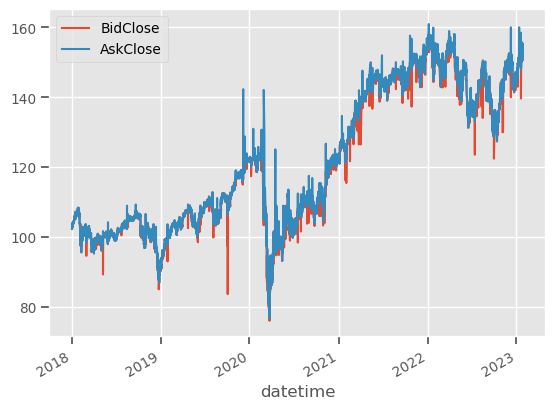

In [26]:
## let's visualize our dataframe.
df_ts.plot()


> Time series visualizations usually require wider figures. 

### Changing Default Figure Size

In [27]:
# check default figsize in rcParams



In [28]:
## Change the default figure size to something wider (12,5)



Text(0.5, 1.0, 'Stock Bids and Asks at Closing')

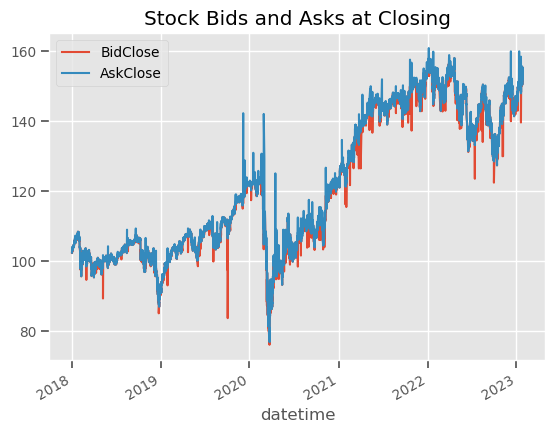

In [29]:
## recreate the plot
ax = df_ts.plot()
ax.set_title('Stock Bids and Asks at Closing')

## Slicing (with a Datetime Index)

In [30]:
## Get all/any dates from 2022
df_ts.loc['2022']


,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-12-30 15:56:00,144.98,145.00
2022-12-30 15:57:00,144.99,145.00
2022-12-30 15:58:00,145.02,145.03


In [31]:
# Get all of january, 2022
df_ts.loc['January 2022']


,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-01-31 15:56:00,151.69,151.72
2022-01-31 15:57:00,151.74,151.77
2022-01-31 15:58:00,151.68,151.71


In [32]:
## Get January 01st, 2022 to March 16th 2022
df_ts.loc['01/01/2022':'03/16/2022']



,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-03-16 15:56:00,149.80,149.83
2022-03-16 15:57:00,149.76,149.78
2022-03-16 15:58:00,149.84,149.85


> Notice the earliest date is 2020-01-03

In [33]:
## Get just 01/03 - AskClose
df_ts.loc['01/03/2022', 'AskClose']


datetime
2022-01-03 09:30:00   154.53
2022-01-03 09:31:00   154.44
2022-01-03 09:32:00   154.39
2022-01-03 09:33:00   154.55
2022-01-03 09:34:00   154.60
                       ...  
2022-01-03 15:56:00   154.86
2022-01-03 15:57:00   154.90
2022-01-03 15:58:00   154.86
2022-01-03 15:59:00   155.00
2022-01-03 16:00:00   155.02
Name: AskClose, Length: 352, dtype: float64

#### We cannot slice out more than 1 <font color="red">NON</font>-continuous date

In [34]:
dates_to_keep = ['01/03/2022','01/05/2022']
try: 
    df_ts.loc[dates_to_keep]
except Exception as e:
    display(e)

KeyError("None of [Index(['01/03/2022', '01/05/2022'], dtype='object', name='datetime')] are in the [index]")

In [35]:
## But can use multiple .loc's in a loop or list comprehension



<Axes: xlabel='datetime'>

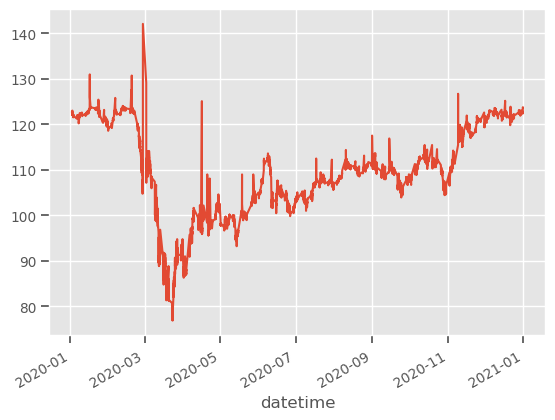

In [36]:
## saving ts to return to later
stock_ts = df_ts.loc['2020','AskClose'].copy()
stock_ts.plot()

In [37]:
## Slicing out the timeperiod for one week in March
eda_ts = df_ts.loc['3/20/2020':'3/28/2020']
eda_ts

,BidClose,AskClose
datetime,,
2020-03-20 09:26:00,80.04,88.83
2020-03-20 09:30:00,85.67,85.86
2020-03-20 09:31:00,85.30,85.54
2020-03-20 09:32:00,85.48,85.63
2020-03-20 09:33:00,85.55,85.70
...,...,...
2020-03-27 15:57:00,90.16,90.21
2020-03-27 15:58:00,90.06,90.16
2020-03-27 15:59:00,90.20,90.30


Text(0.5, 1.0, 'Plot of March 20th 2020 to March 28th, 2020')

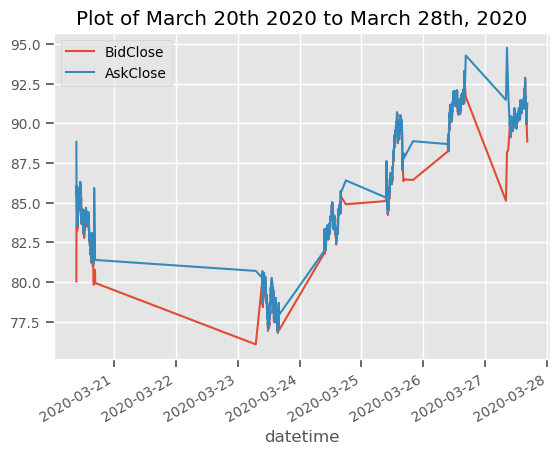

In [38]:
ax = eda_ts.plot()
ax.set_title('Plot of March 20th 2020 to March 28th, 2020')

#### 🧠 Why are there gaps in the data above?

In [39]:
## Check for nulls in eda_ts...
eda_ts.isna().sum()

BidClose    0
AskClose    0
dtype: int64

> What day of the week were the days missing data?

In [ ]:
## what day of the week were the days missing data?



In [ ]:
## What is the other day?


#### 🧠 Is this date regular or irregular?

## <font color='blue'> Step 4: </font>Resampling to Desired Frequency

### Pandas Frequency Codes

![pandas frequency codes](pandas_freq_cheatsheet.png)

In [204]:
## what is our datetime index's frequency?
df_ts.index


DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=445762, freq=None)

In [47]:
## Resample as last value by minute
ts_min = eda_ts.resample('min').last()
ts_min.head()

,BidClose,AskClose
datetime,,
2020-03-20 09:26:00,80.04,88.83
2020-03-20 09:27:00,NaN,NaN
2020-03-20 09:28:00,NaN,NaN
2020-03-20 09:29:00,NaN,NaN
2020-03-20 09:30:00,85.67,85.86


In [48]:
## check the index
ts_min.index

DatetimeIndex(['2020-03-20 09:26:00', '2020-03-20 09:27:00',
               '2020-03-20 09:28:00', '2020-03-20 09:29:00',
               '2020-03-20 09:30:00', '2020-03-20 09:31:00',
               '2020-03-20 09:32:00', '2020-03-20 09:33:00',
               '2020-03-20 09:34:00', '2020-03-20 09:35:00',
               ...
               '2020-03-27 16:08:00', '2020-03-27 16:09:00',
               '2020-03-27 16:10:00', '2020-03-27 16:11:00',
               '2020-03-27 16:12:00', '2020-03-27 16:13:00',
               '2020-03-27 16:14:00', '2020-03-27 16:15:00',
               '2020-03-27 16:16:00', '2020-03-27 16:17:00'],
              dtype='datetime64[ns]', name='datetime', length=10492, freq='T')

In [49]:
## Check the original data shape
eda_ts.shape

(2360, 2)

In [50]:
## Check for original data NAs
eda_ts.isna().sum()

BidClose    0
AskClose    0
dtype: int64

In [51]:
## Check new data shape
ts_min.shape

(10492, 2)

In [52]:
## Check new data for NAs
ts_min.isna().sum()

BidClose    8132
AskClose    8132
dtype: int64

Why are there missing values now?

<Axes: xlabel='datetime'>

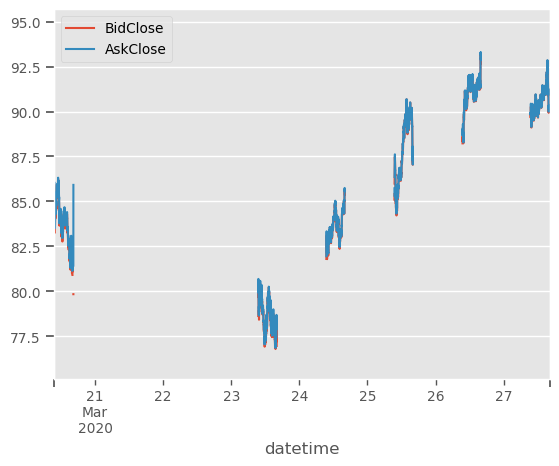

In [53]:
# Plot resampled data
ts_min.plot()

## <font color='blue'> Step 5: </font>Imputing Null Values (time series style!)

### Backfill `.fillna(method='bfill')`

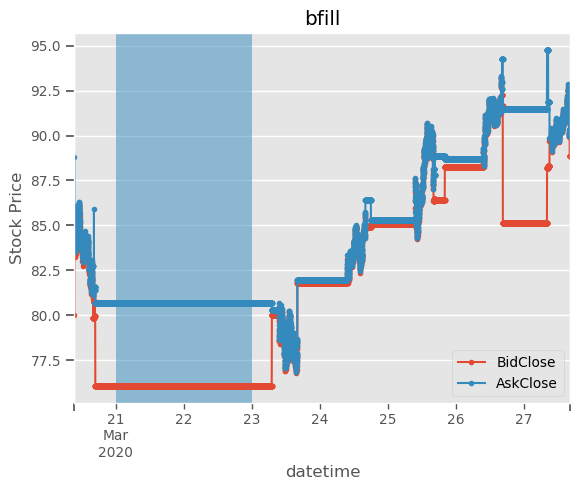

In [56]:
# Fill with back fill
ts_bfill = ts_min.fillna(method='bfill')
#plot backfilled data
ax = ts_bfill.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Stock Price");

### Forward Fill `.fillna(method='ffill')`

In [ ]:
# Fill with forward fill

#plot forward data
ax = ts_ffill.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='ffill', ylabel="Stock Price");

### Interpolate `.interpolate()`

In [ ]:
# Interpolate missing data

# Plot interpolated data
ax = ts_interpolate.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='interpolate', ylabel="Stock Price");

# Working with Wide-Form Time Series Data

## <font color='blue'> Step 1 </font>: Convert datetime to One Column

In [58]:
crypto = pd.read_csv("Data/stocks/wide-form-crypto.csv")
crypto

,CryptoCurrency,Symbol,Currency,2014-09-17,2014-09-18,2014-09-19,2014-09-20,2014-09-21,2014-09-22,2014-09-23,...,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-21,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26
0,Bitcoin,BTC-USD,BTC,457.33,424.44,394.80,408.90,398.82,402.15,435.79,...,"21,161.52","20,688.78","21,086.79","22,676.55","22,777.62","22,720.42","22,934.43","22,636.47","23,117.86","23,032.78"
1,Etherium,ETH-USD,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,567.85","1,515.51","1,552.56","1,659.75","1,627.12","1,628.38","1,628.25","1,556.60","1,611.71","1,603.11"
2,Dogecoin,DOGE-USD,DOGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,0.08,0.08,0.09,0.08,0.09,0.09,0.08,0.09,0.09


In [59]:
## First 3 columns are id columns.  set to id_vars
id_vars = crypto.columns[:3]
id_vars

Index(['CryptoCurrency', 'Symbol', 'Currency'], dtype='object')

In [60]:
## Melt the crypto data 
## set the var_name  as "Date" and the value_name was "Currency Value

long_crypto = pd.melt(crypto, id_vars=id_vars, value_name='Value', var_name='Date')
long_crypto

,CryptoCurrency,Symbol,Currency,Date,Value
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


## <font color='blue'> Step 2: </font> Converting datetime Column to datetime Type

In [61]:
## Now make Date column datetime 
fmt = "Y-m-d"
long_crypto['Date'] = pd.to_datetime(long_crypto['Date'])
long_crypto

,CryptoCurrency,Symbol,Currency,Date,Value
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


In [62]:
long_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CryptoCurrency  9162 non-null   object        
 1   Symbol          9162 non-null   object        
 2   Currency        9162 non-null   object        
 3   Date            9162 non-null   datetime64[ns]
 4   Value           6864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 358.0+ KB


## <font color='blue'> Step 3: </font> Set datetime as Index

In [63]:
## Set Date as index
long_crypto = long_crypto.set_index('Date')
long_crypto

,CryptoCurrency,Symbol,Currency,Value
Date,,,,
2014-09-17,Bitcoin,BTC-USD,BTC,457.33
2014-09-17,Etherium,ETH-USD,ETH,NaN
2014-09-17,Dogecoin,DOGE-USD,DOGE,NaN
2014-09-18,Bitcoin,BTC-USD,BTC,424.44
2014-09-18,Etherium,ETH-USD,ETH,NaN
...,...,...,...,...
2023-01-25,Etherium,ETH-USD,ETH,"1,611.71"
2023-01-25,Dogecoin,DOGE-USD,DOGE,0.09
2023-01-26,Bitcoin,BTC-USD,BTC,"23,032.78"


In [64]:
long_crypto.index

DatetimeIndex(['2014-09-17', '2014-09-17', '2014-09-17', '2014-09-18',
               '2014-09-18', '2014-09-18', '2014-09-19', '2014-09-19',
               '2014-09-19', '2014-09-20',
               ...
               '2023-01-23', '2023-01-24', '2023-01-24', '2023-01-24',
               '2023-01-25', '2023-01-25', '2023-01-25', '2023-01-26',
               '2023-01-26', '2023-01-26'],
              dtype='datetime64[ns]', name='Date', length=9162, freq=None)

## <font color='blue'> Step 4: </font> Resample to Desired Frequency

In [65]:
# Aggregate by currency and resample as daily. Keep only 'Value' column

crypto_ts = long_crypto.groupby('Currency').resample('D').last()
crypto_ts

CryptoCurrency   Symbol Currency    Value
Currency Date                                                
BTC      2014-09-17        Bitcoin  BTC-USD      BTC   457.33
         2014-09-18        Bitcoin  BTC-USD      BTC   424.44
         2014-09-19        Bitcoin  BTC-USD      BTC   394.80
         2014-09-20        Bitcoin  BTC-USD      BTC   408.90
         2014-09-21        Bitcoin  BTC-USD      BTC   398.82
...                            ...      ...      ...      ...
ETH      2023-01-22       Etherium  ETH-USD      ETH 1,628.38
         2023-01-23       Etherium  ETH-USD      ETH 1,628.25
         2023-01-24       Etherium  ETH-USD      ETH 1,556.60
         2023-01-25       Etherium  ETH-USD      ETH 1,611.71
         2023-01-26       Etherium  ETH-USD      ETH 1,603.11

[9162 rows x 4 columns]

In [66]:
type(crypto_ts)

pandas.core.frame.DataFrame

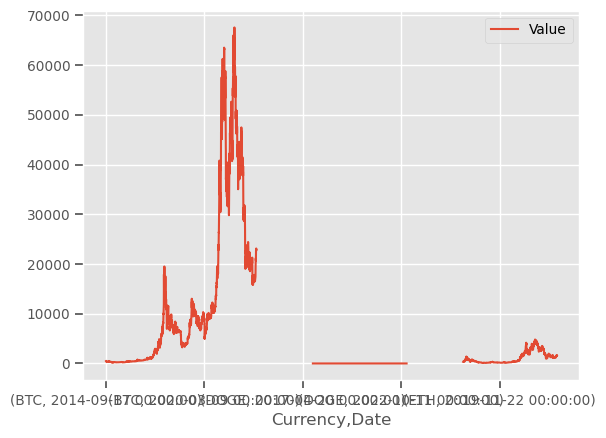

In [67]:
crypto_ts.plot();

> What are we seeing?  What do we want to see?

## Unstacking

In [79]:
crypto_ts = crypto_ts['Value']
crypto_ts

Currency  Date      
BTC       2014-09-17     457.33
          2014-09-18     424.44
          2014-09-19     394.80
          2014-09-20     408.90
          2014-09-21     398.82
                         ...   
ETH       2023-01-22   1,628.38
          2023-01-23   1,628.25
          2023-01-24   1,556.60
          2023-01-25   1,611.71
          2023-01-26   1,603.11
Name: Value, Length: 9162, dtype: float64

In [69]:
crypto_ts.index

MultiIndex([('BTC', '2014-09-17'),
            ('BTC', '2014-09-18'),
            ('BTC', '2014-09-19'),
            ('BTC', '2014-09-20'),
            ('BTC', '2014-09-21'),
            ('BTC', '2014-09-22'),
            ('BTC', '2014-09-23'),
            ('BTC', '2014-09-24'),
            ('BTC', '2014-09-25'),
            ('BTC', '2014-09-26'),
            ...
            ('ETH', '2023-01-17'),
            ('ETH', '2023-01-18'),
            ('ETH', '2023-01-19'),
            ('ETH', '2023-01-20'),
            ('ETH', '2023-01-21'),
            ('ETH', '2023-01-22'),
            ('ETH', '2023-01-23'),
            ('ETH', '2023-01-24'),
            ('ETH', '2023-01-25'),
            ('ETH', '2023-01-26')],
           names=['Currency', 'Date'], length=9162)

In [80]:
crypto_unstacked = crypto_ts.unstack(0)
crypto_unstacked

Currency,BTC,DOGE,ETH
Date,,,
2014-09-17,457.33,NaN,NaN
2014-09-18,424.44,NaN,NaN
2014-09-19,394.80,NaN,NaN
2014-09-20,408.90,NaN,NaN
2014-09-21,398.82,NaN,NaN
...,...,...,...
2023-01-22,"22,720.42",0.09,"1,628.38"
2023-01-23,"22,934.43",0.09,"1,628.25"
2023-01-24,"22,636.47",0.08,"1,556.60"


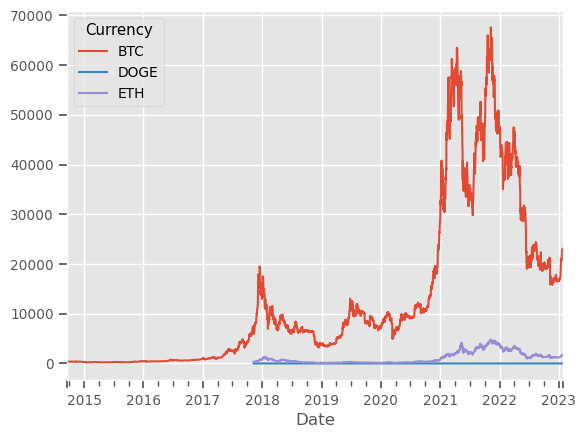

In [81]:
crypto_unstacked.plot();

## Selecting our TS for Resampling Demonstration

In [ ]:
## Select only Bitcoin from 2021 to 2022
ts = ##
ts

In [ ]:
ts.plot();

## Resampling

In [ ]:
## Check the index to confirm the current freq
ts.index

### Resample as Weeks Frequency

- We need to look up the correct frequency code for minutes: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects 
    

In [ ]:
## Resample as week, keeping last value
ts_W = ##
ts_W

In [ ]:
ts_W.index

In [ ]:
## Check day of week for the weekly entries.  What day is it?
pd.to_datetime('2021-01-03').day_name()

### Let's resample and plot our ts as daily, weekly, and monthly to compare.

In [82]:
freqs = ['D','W','M','Q','A']


for freq in freqs:
    ax = ts.plot(label='Original',  style='.-',
            title=f'Comparing Resampled Frequencies: {freq}');

    ts_temp = ts.resample(freq).last()
    ts_temp.plot(style='o-', label=freq,ax=ax)
    plt.legend()
    plt.show()

NameError: name 'ts' is not defined

# Save the new processed data

In [ ]:
import os
folder = "Data/FromClass"
os.makedirs(folder, exist_ok=True)

In [ ]:
df_ts.to_csv(folder + 'SP500-Close-Prices.csv')

In [ ]:
crypto_unstacked.to_csv(folder + 'crypto_currencies.csv')

# Appendix: Using Tick Date Formatters/Locators

- Let's add a minor xtick every 3 months.
- Using matplotlib.dates library

In [ ]:
import matplotlib.dates as mdates

In [ ]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

In [ ]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

In [ ]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)





# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90, ha='center')

In [ ]:
def format_xdates_stocks(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig


In [ ]:
ax = df_ts.plot()
format_xdates_stocks(ax);